___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)   

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Womens Clothing E-Commerce Reviews.csv",index_col=0)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
# 1: tavsiye ediyorum 
# 0 : tavsiye etmiyorum.BUNU DEĞİŞTİRMEMİZ GEREKİYOR.

In [5]:
df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})

### Data Wrangling

In [6]:
#!pip install matplotlib==3.4

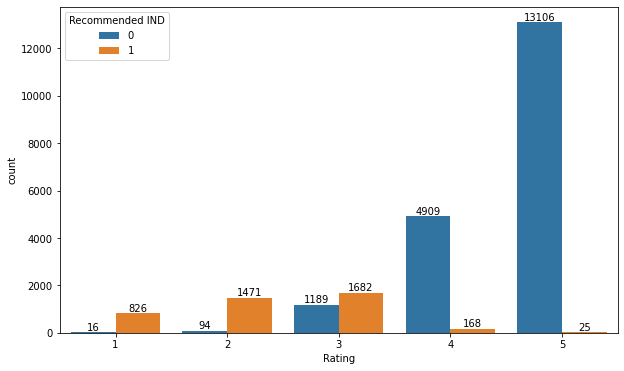

In [7]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

### ürüne 5 yılıdz verenlerin sadece 25 kişisi ürünü tavsiye etmiyor 13K kişi tavsiye ediyor.
### ürüne 4 yıldız verenlerin de büyük çoğunluğu ürünü tavsiye ediyor.
### AMA 3 yıldız ve altında yıldız verenlerin ise büyük çoğunluğu ürünü tavsiye ETMİYOR.


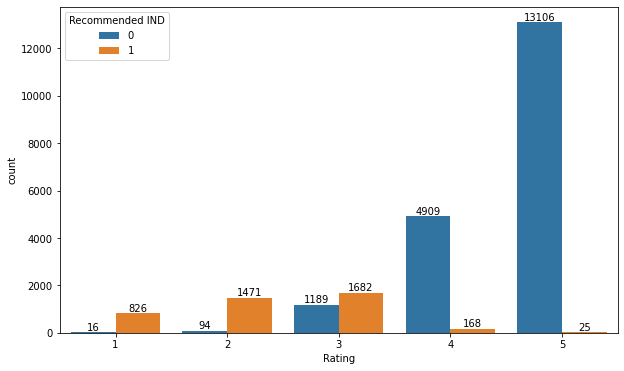

In [8]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [9]:
df["Rating"].value_counts()      

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

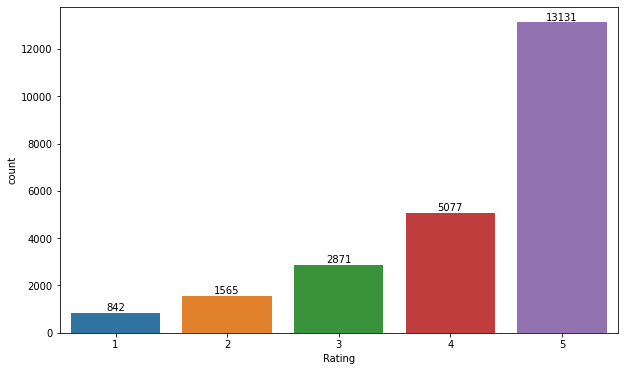

In [10]:
ax = sns.countplot(data =df, x = "Rating")
ax.bar_label(ax.containers[0]);

In [11]:
## 5 yıldız verenler çoğunlukta

#### Check Proportion of Target Class Variable:

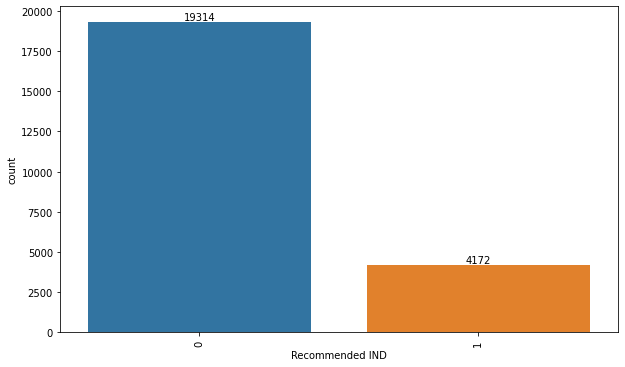

In [12]:
ax = sns.countplot(data =df, x ="Recommended IND")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

In [13]:
df["Recommended IND"].value_counts(dropna = False)

0    19314
1     4172
Name: Recommended IND, dtype: int64

## Aldıkları ürünü tavsiye edenler çoğunlukta ama bizim için önemli olan şu anda tavsiye etmeyenler bu hususa dikkat edelim.

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

## peki hangi kategorideki ürünler önerilmiyor  genelde ?

In [14]:
df[df["Recommended IND"] == 1]["Department Name"].value_counts()

Tops        1935
Dresses     1212
Bottoms      565
Intimate     260
Jackets      169
Trend         31
Name: Department Name, dtype: int64

In [15]:
df[df["Recommended IND"] == 1]["Class Name"].value_counts()

Dresses       1212
Knits          883
Blouses        588
Sweaters       285
Pants          232
Fine gauge     179
Skirts         146
Jeans          136
Jackets        109
Lounge          97
Swim            68
Outerwear       60
Shorts          51
Sleep           33
Trend           31
Legwear         23
Intimates       22
Layering        17
Name: Class Name, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [16]:
df = df[["Review Text","Recommended IND"]]
df.head()


,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


In [17]:
df.rename(columns={"Review Text":"Text", "Recommended IND":"Target_label"}, inplace=True)

In [18]:
df.head()

,Text,Target_label
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


### Missing Value Detection

In [19]:
df.isnull().sum()

Text            845
Target_label      0
dtype: int64

In [20]:
df.shape[0] - df.dropna().shape[0]

845

In [21]:
df.dropna(inplace = True)


,Text,Target_label
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
23481,I was very happy to snag this dress at such a ...,0
23482,"It reminds me of maternity clothes. soft, stre...",0
23483,"This fit well, but the top was very see throug...",1
23484,I bought this dress for a wedding i have this ...,0


In [22]:
df.isna().sum()

Text            0
Target_label    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [23]:
df2 = df.copy()

In [24]:
np.array(df2["Text"].sample(10))

array(['I saw this dress in the store window and gave it a try. i found it to be super flattering and feminine. the bodice is form fitting and the skirt flares out to a full skirt. the colors are fun and vibrant. the neckline is a bit low for work but perfect for evening. it is true to size.',
       'I ordered size small. i am 5\' 6", 32 b. the fabric is super soft and the fit is great. there\'s an adorable little quote on the pantie\'s lining, and the bra has a beautiful print on its inner lining. the feel of the lace and fabric is divine. love it! one more thing to note...there is very little lining in the bra; really nothing more than an extra layer of fabric. it is enough to protect modesty, but not much else.',
       "Just got these today because they were a steal of a deal with the sale on sale. was super excited because the pattern is adorable! i put them on tonight and noticed that they, firstly, aren't eloise like i assumed they would be, and secondly, that they weren't as s

In [25]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [26]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [27]:
cleaning_text = df2["Text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Text, dtype: object

In [28]:
np.array(cleaning_text)

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely platinum feminine fit perfectly e

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [29]:
positive_sen = df2[df2["Target_label"]==0]["Text"]
positive_sen

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Text, Length: 18540, dtype: object

In [30]:
negative_sen = df2[df2["Target_label"]==1]["Text"]
negative_sen

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: Text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [31]:
all_positive = " ".join(positive_sen)
all_positive[:100]

"Absolutely wonderful - silky and sexy and comfortable Love this dress!  it's sooo pretty.  i happene"

In [32]:
all_negative = " ".join(negative_sen)
all_negative[:100]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [33]:
from wordcloud import WordCloud

In [35]:
import numpy as np
from PIL import Image
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/NLP/sentiment1.png"))

In [36]:
wordcloud = WordCloud(background_color="white", max_words =150,mask=mask,contour_color = "firebrick",contour_width=1)

In [37]:
wordcloud.generate(all_positive)

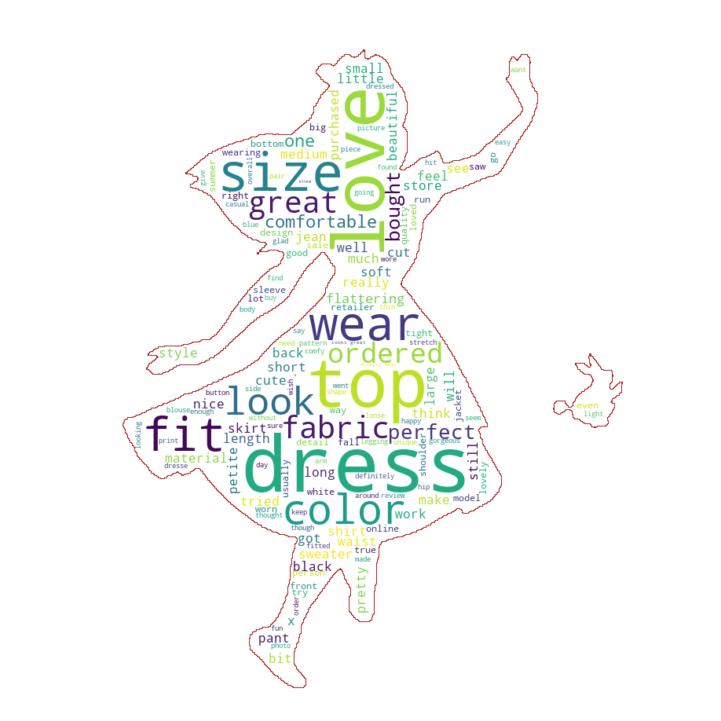

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

In [39]:
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/NLP/sentim2.jpg"))

In [40]:
wordcloud = WordCloud(background_color="white", max_words =150,mask=mask,contour_color = "firebrick",contour_width=1)

In [41]:
wordcloud.generate(all_negative)

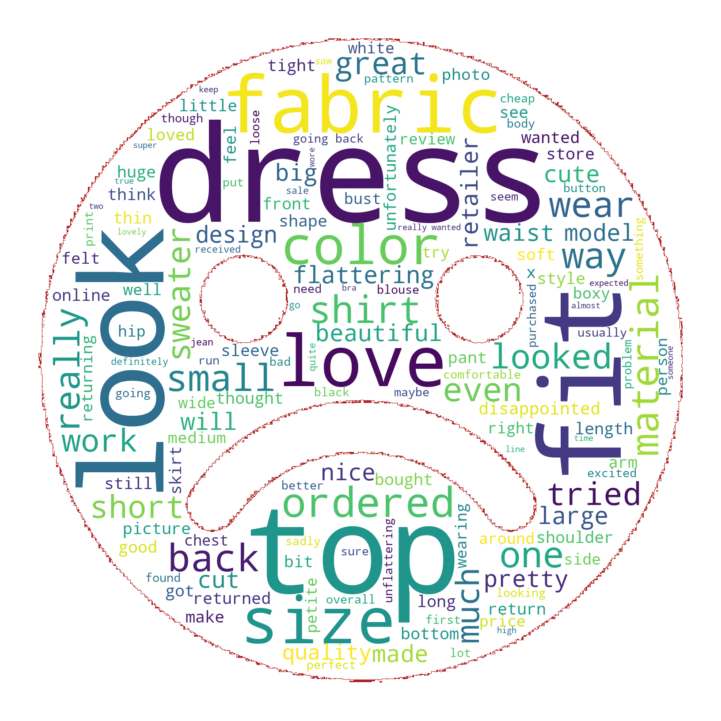

In [42]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df2["Text"]
y= df2["Target_label"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [48]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)            
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

## Logistic Regression

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [52]:
from sklearn.model_selection import cross_validate

In [53]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### CountVectorizer

In [54]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101,C = 0.02)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [55]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[2371  411]
 [  89  526]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2782
           1       0.56      0.86      0.68       615

    accuracy                           0.85      3397
   macro avg       0.76      0.85      0.79      3397
weighted avg       0.89      0.85      0.86      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     15758
           1       0.60      0.90      0.72      3486

    accuracy                           0.87     19244
   macro avg       0.79      0.88      0.82     19244
weighted avg       0.91      0.87      0.88     19244



In [56]:
scoring = ['precision','recall','f1','accuracy']

In [57]:
model = LogisticRegression(C = 0.02, max_iter=1000,class_weight='balanced',random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.161793,0.004486,0.564639,0.598218,0.851003,0.898948,0.678857,0.718380,0.854026,0.872337
2,0.157727,0.004330,0.562500,0.595071,0.876791,0.892891,0.685330,0.714176,0.854026,0.870547
3,0.167394,0.004650,0.555344,0.596853,0.833811,0.894804,0.666667,0.716071,0.848831,0.871471
4,0.173259,0.004398,0.603376,0.597243,0.819484,0.897673,0.695018,0.717269,0.869610,0.871817
5,0.151936,0.004581,0.553903,0.597405,0.856322,0.895156,0.672686,0.716582,0.849272,0.871709
6,0.144086,0.004292,0.539924,0.603209,0.816092,0.898662,0.649886,0.721874,0.840956,0.874538
7,0.148921,0.004159,0.557196,0.598635,0.867816,0.894519,0.678652,0.717261,0.851351,0.872229
8,0.158175,0.004294,0.564885,0.597540,0.850575,0.898024,0.678899,0.717596,0.854470,0.871940
9,0.150556,0.004186,0.559925,0.599616,0.856734,0.896079,0.677237,0.718466,0.851871,0.872806
10,0.151390,0.004392,0.605263,0.592421,0.856734,0.897035,0.709371,0.713579,0.872661,0.869573


In [58]:
df_scores.mean()[2:]

test_precision     0.566695
train_precision    0.597621
test_recall        0.848536
train_recall       0.896379
test_f1            0.679260
train_f1           0.717126
test_accuracy      0.854708
train_accuracy     0.871897
dtype: float64

In [59]:
from yellowbrick.classifier import PrecisionRecallCurve

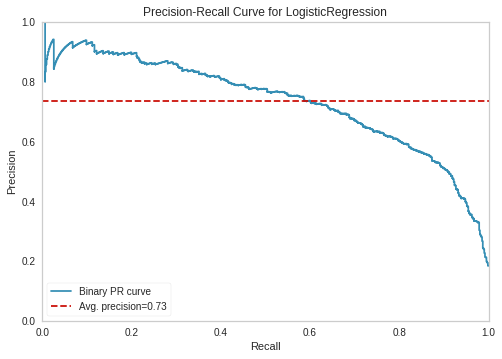

In [60]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000,class_weight='balanced',random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)                   # modeli sıfırlayıp veriyoruz zaten burada fit predict var.
viz.show();

### TF-IDF

In [61]:
log = LogisticRegression(C = 0.02,max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [62]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2278  504]
 [  93  522]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2782
           1       0.51      0.85      0.64       615

    accuracy                           0.82      3397
   macro avg       0.73      0.83      0.76      3397
weighted avg       0.88      0.82      0.84      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     15758
           1       0.53      0.88      0.66      3486

    accuracy                           0.84     19244
   macro avg       0.75      0.85      0.78     19244
weighted avg       0.89      0.84      0.85     19244



In [63]:
model = LogisticRegression(C = 0.02,max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.072912,0.004790,0.530973,0.530341,0.859599,0.877590,0.656455,0.661143,0.836883,0.837058
2,0.062457,0.004106,0.515152,0.528756,0.876791,0.876315,0.648993,0.659549,0.828052,0.836134
3,0.061683,0.004267,0.522046,0.529660,0.848138,0.879503,0.646288,0.661155,0.831688,0.836711
4,0.066705,0.004263,0.540037,0.533501,0.830946,0.880778,0.654628,0.664502,0.841039,0.838905
5,0.074717,0.004819,0.510345,0.530408,0.850575,0.878266,0.637931,0.661387,0.825364,0.837067
6,0.063890,0.004754,0.500873,0.534095,0.824713,0.878585,0.623236,0.664337,0.819647,0.839145
7,0.074755,0.004461,0.495098,0.529662,0.870690,0.873486,0.631250,0.659449,0.816008,0.836547
8,0.060710,0.004553,0.517422,0.531081,0.853448,0.876673,0.644252,0.661457,0.829522,0.837413
9,0.050052,0.004503,0.507589,0.530137,0.862464,0.877590,0.639066,0.660984,0.823285,0.836952
10,0.055909,0.004540,0.544484,0.526789,0.876791,0.877590,0.671789,0.658376,0.844595,0.835046


In [64]:
df_scores.mean()[2:]

test_precision     0.518402
train_precision    0.530443
test_recall        0.855415
train_recall       0.877638
test_f1            0.645389
train_f1           0.661234
test_accuracy      0.829608
train_accuracy     0.837098
dtype: float64

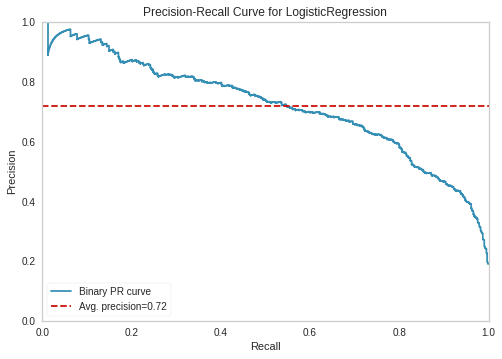

In [65]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000,class_weight='balanced',random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## *******************

In [66]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.61061048, 0.61061048, 2.76018359, ..., 0.61061048, 0.61061048,
       0.61061048])

## Naive Bayes 

### Countvectorizer

In [67]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [68]:
nb = MultinomialNB(alpha=2)
nb.fit(X_train_count,y_train,sample_weight=classes_weights)

MultinomialNB(alpha=2)

In [69]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[2363  419]
 [  76  539]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2782
           1       0.56      0.88      0.69       615

    accuracy                           0.85      3397
   macro avg       0.77      0.86      0.80      3397
weighted avg       0.90      0.85      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     15758
           1       0.60      0.91      0.72      3486

    accuracy                           0.87     19244
   macro avg       0.79      0.89      0.82     19244
weighted avg       0.91      0.87      0.88     19244



In [71]:
model = MultinomialNB(alpha=2)  
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, 
                        fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.025668,0.014580,0.552536,0.605191,0.873926,0.914249,0.677026,0.728288,0.848831,0.876436
2,0.023142,0.020838,0.574109,0.600294,0.876791,0.912018,0.693878,0.724029,0.859740,0.874069
3,0.013039,0.006649,0.572779,0.598499,0.868195,0.915206,0.690205,0.723721,0.858701,0.873434
4,0.012749,0.007388,0.601610,0.599538,0.856734,0.910105,0.706856,0.722876,0.871169,0.873607
5,0.012334,0.007862,0.560150,0.603762,0.856322,0.910453,0.677273,0.726048,0.852391,0.875520
6,0.012236,0.010527,0.569498,0.603145,0.847701,0.916826,0.681293,0.727618,0.856549,0.875635
7,0.013261,0.007987,0.556777,0.600755,0.873563,0.913002,0.680089,0.724674,0.851351,0.874307
8,0.014154,0.007161,0.567416,0.600671,0.870690,0.912683,0.687075,0.724513,0.856549,0.874249
9,0.013315,0.006366,0.552102,0.603321,0.865330,0.914887,0.674107,0.727135,0.848233,0.875635
10,0.025234,0.016382,0.596899,0.596422,0.882521,0.913931,0.712139,0.721803,0.870582,0.872402


In [72]:
df_scores.mean()[2:]

test_precision     0.570388
train_precision    0.601160
test_recall        0.867177
train_recall       0.913336
test_f1            0.687994
train_f1           0.725070
test_accuracy      0.857410
train_accuracy     0.874529
dtype: float64

In [73]:
## sample_weight":classes_weights !!!!!!!!!!!!!!!!!!!!!!!!

In [75]:
# from yellowbrick.classifier import PrecisionRecallCurve

# viz = PrecisionRecallCurve(
#     MultinomialNB(alpha=2),
#     classes=nb.classes_,         # targettaki class' lar ile aynı isimler döndürsün diye
#     per_class=True,              # her bir class için pr curve çizsin diye
#     cmap="Set1"
# )
# viz.fit(X_train_count,y_train)
# viz.score(X_test_count, y_test)
# viz.show();

### TF-IDF

In [76]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = BernoulliNB()   # alpha burada default haliyle kaldı çünkü overfiti gidermiş zaten
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [77]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[2542  240]
 [ 157  458]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2782
           1       0.66      0.74      0.70       615

    accuracy                           0.88      3397
   macro avg       0.80      0.83      0.81      3397
weighted avg       0.89      0.88      0.89      3397

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15758
           1       0.68      0.79      0.73      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.86      0.83     19244
weighted avg       0.90      0.90      0.90     19244



In [79]:
model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.029634,0.012708,0.630695,0.687656,0.753582,0.790245,0.686684,0.735390,0.875325,0.896992
2,0.016736,0.008750,0.645631,0.685928,0.762178,0.790883,0.699080,0.734676,0.881039,0.896530
3,0.015356,0.015898,0.665782,0.686987,0.719198,0.801084,0.691460,0.739662,0.883636,0.897858
4,0.017692,0.010706,0.666667,0.687741,0.687679,0.797577,0.677010,0.738598,0.881039,0.897742
5,0.014042,0.005167,0.611794,0.689607,0.715517,0.788719,0.659603,0.735841,0.866424,0.897402
6,0.009970,0.005375,0.629540,0.690199,0.747126,0.794455,0.683311,0.738667,0.874740,0.898152
7,0.009867,0.005021,0.624390,0.687535,0.735632,0.790950,0.675462,0.735625,0.872141,0.896998
8,0.009602,0.004880,0.616307,0.683576,0.738506,0.794455,0.671895,0.734856,0.869543,0.896132
9,0.009474,0.005177,0.669136,0.685809,0.776504,0.791839,0.718833,0.735020,0.889813,0.896594
10,0.009752,0.005053,0.643032,0.681506,0.753582,0.790564,0.693931,0.731995,0.879418,0.895150


In [80]:
df_scores.mean()[2:]

test_precision     0.640297
train_precision    0.686654
test_recall        0.738950
train_recall       0.793077
test_f1            0.685727
train_f1           0.736033
test_accuracy      0.877312
train_accuracy     0.896955
dtype: float64

In [81]:
# viz = PrecisionRecallCurve(
#     BernoulliNB(),
#     classes=nb.classes_,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train_tf_idf,y_train)
# viz.score(X_test_tf_idf, y_test)
# viz.show();

## Support Vector Machine (SVM)

### Countvectorizer

In [82]:
from sklearn.svm import LinearSVC 
svc = LinearSVC(class_weight="balanced",C=0.01,random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [83]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2416  366]
 [  93  522]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2782
           1       0.59      0.85      0.69       615

    accuracy                           0.86      3397
   macro avg       0.78      0.86      0.80      3397
weighted avg       0.90      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15758
           1       0.65      0.93      0.77      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.91      0.85     19244
weighted avg       0.92      0.90      0.90     19244



In [84]:
model = LinearSVC(C=0.01,class_weight="balanced",random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.097547,0.004951,0.579365,0.655405,0.836676,0.927638,0.684642,0.768114,0.860260,0.898551
2,0.085879,0.004248,0.587426,0.654354,0.856734,0.931782,0.696970,0.768806,0.864935,0.898493
3,0.089758,0.004415,0.581967,0.654174,0.813754,0.929232,0.678614,0.767812,0.860260,0.898204
4,0.090241,0.004266,0.617778,0.654105,0.796562,0.929551,0.695870,0.767874,0.873766,0.898204
5,0.090073,0.004900,0.569231,0.656095,0.850575,0.929573,0.682028,0.769251,0.856549,0.898961
6,0.088322,0.004502,0.570552,0.656054,0.801724,0.932441,0.666667,0.770203,0.854990,0.899192
7,0.085844,0.004799,0.594810,0.650868,0.856322,0.932122,0.702002,0.766509,0.868503,0.897113
8,0.091363,0.005176,0.604418,0.652077,0.864943,0.930529,0.711584,0.766807,0.873181,0.897460
9,0.081995,0.004210,0.587302,0.655072,0.848138,0.930507,0.694021,0.768866,0.864345,0.898672
10,0.084980,0.004512,0.620253,0.648721,0.842407,0.929551,0.714459,0.764151,0.877859,0.896074


In [85]:
df_scores.mean()[2:]

test_precision     0.591310
train_precision    0.653693
test_recall        0.836783
train_recall       0.930292
test_f1            0.692686
train_f1           0.767839
test_accuracy      0.865465
train_accuracy     0.898092
dtype: float64

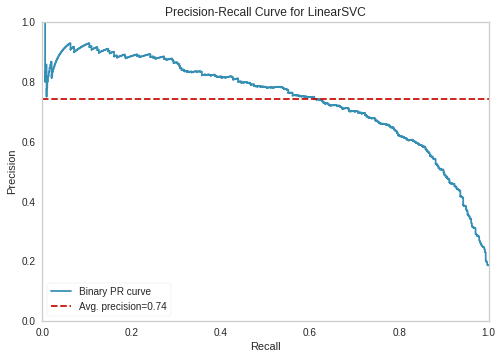

In [86]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01,class_weight="balanced",random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TD-IDF

In [87]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1,class_weight="balanced",random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=101)

In [88]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2393  389]
 [  89  526]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2782
           1       0.57      0.86      0.69       615

    accuracy                           0.86      3397
   macro avg       0.77      0.86      0.80      3397
weighted avg       0.89      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15758
           1       0.64      0.94      0.76      3486

    accuracy                           0.89     19244
   macro avg       0.81      0.91      0.85     19244
weighted avg       0.92      0.89      0.90     19244



In [89]:
model = LinearSVC(C=0.1,class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.053296,0.004792,0.580460,0.644815,0.868195,0.937520,0.695752,0.764095,0.862338,0.895144
2,0.049581,0.004087,0.582692,0.645614,0.868195,0.938476,0.697353,0.764973,0.863377,0.895548
3,0.052294,0.004633,0.588710,0.640123,0.836676,0.932738,0.691124,0.759211,0.864416,0.892834
4,0.048862,0.003828,0.618844,0.643593,0.828080,0.936564,0.708333,0.762919,0.876364,0.894567
5,0.049146,0.004222,0.568224,0.644800,0.873563,0.936584,0.688562,0.763773,0.857069,0.895035
6,0.047833,0.004249,0.571717,0.648107,0.813218,0.938496,0.671412,0.766727,0.856029,0.896536
7,0.047908,0.004406,0.585878,0.644483,0.882184,0.938177,0.704128,0.764080,0.865904,0.895035
8,0.048944,0.004744,0.598425,0.639634,0.873563,0.934990,0.710280,0.759612,0.871102,0.892783
9,0.047994,0.004305,0.583493,0.640823,0.871060,0.932738,0.698851,0.759704,0.863825,0.893129
10,0.047633,0.004121,0.618367,0.638293,0.868195,0.939433,0.722288,0.760124,0.878898,0.892610


In [90]:
df_scores.mean()[2:]

test_precision     0.589681
train_precision    0.643029
test_recall        0.858293
train_recall       0.936572
test_f1            0.698808
train_f1           0.762522
test_accuracy      0.865932
train_accuracy     0.894322
dtype: float64

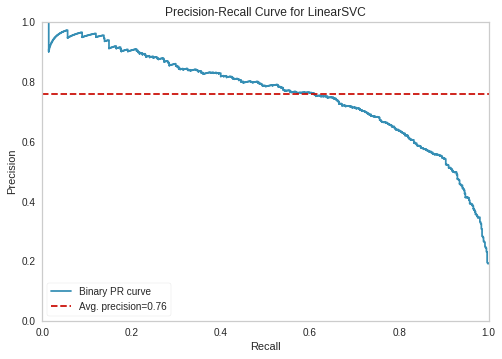

In [91]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1,class_weight="balanced"),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## Random Forest

### Countvectorizer

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 7, random_state = 101, n_jobs = -1,class_weight="balanced") 
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [99]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2339  443]
 [ 138  477]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2782
           1       0.52      0.78      0.62       615

    accuracy                           0.83      3397
   macro avg       0.73      0.81      0.76      3397
weighted avg       0.87      0.83      0.84      3397

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     15758
           1       0.55      0.84      0.67      3486

    accuracy                           0.85     19244
   macro avg       0.76      0.84      0.78     19244
weighted avg       0.89      0.85      0.86     19244



In [100]:
model = RandomForestClassifier(n_estimators=100, max_depth= 7, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True,error_score='raise')
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.599106,0.106433,0.512915,0.530665,0.796562,0.857826,0.624018,0.655702,0.825974,0.836827
2,0.601301,0.106175,0.494810,0.542991,0.819484,0.849538,0.617044,0.662523,0.815584,0.843236
3,1.051842,0.109942,0.513612,0.555044,0.810888,0.845394,0.628889,0.670120,0.826494,0.849241
4,0.668309,0.106467,0.553785,0.540258,0.796562,0.855595,0.653349,0.662307,0.846753,0.841965
5,0.609483,0.106439,0.520354,0.546805,0.844828,0.856278,0.644031,0.667412,0.831081,0.845381
6,0.598196,0.106224,0.497164,0.557826,0.755747,0.843850,0.599772,0.671655,0.817568,0.850520
7,0.593174,0.106141,0.525046,0.565888,0.813218,0.841619,0.638106,0.676746,0.833160,0.854330
8,0.617397,0.106157,0.520231,0.553766,0.775862,0.843531,0.622837,0.668603,0.830042,0.848499
9,0.595193,0.108135,0.528409,0.553895,0.799427,0.838699,0.636260,0.667174,0.834200,0.848441
10,0.597723,0.106570,0.541267,0.548950,0.808023,0.841887,0.648276,0.664570,0.840956,0.846074


In [101]:
df_scores.mean()[2:]

test_precision     0.520759
train_precision    0.549609
test_recall        0.802060
train_recall       0.847422
test_f1            0.631258
train_f1           0.666681
test_accuracy      0.830181
train_accuracy     0.846451
dtype: float64

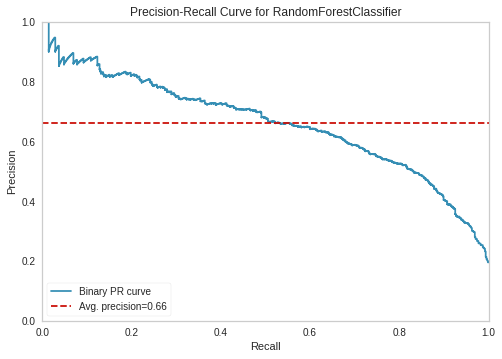

In [102]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1,class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TF-IDF

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 7, class_weight="balanced", random_state = 101, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [104]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2280  502]
 [ 126  489]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2782
           1       0.49      0.80      0.61       615

    accuracy                           0.82      3397
   macro avg       0.72      0.81      0.74      3397
weighted avg       0.87      0.82      0.83      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     15758
           1       0.54      0.87      0.67      3486

    accuracy                           0.84     19244
   macro avg       0.75      0.85      0.78     19244
weighted avg       0.89      0.84      0.86     19244



In [105]:
model = RandomForestClassifier(n_estimators=100, max_depth= 7, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.505341
train_precision    0.549229
test_recall        0.796606
train_recall       0.862721
test_f1            0.618279
train_f1           0.671101
test_accuracy      0.821762
train_accuracy     0.846786
dtype: float64

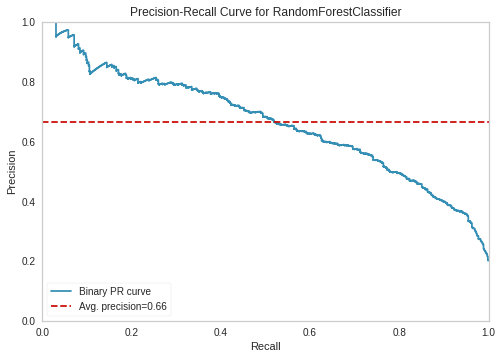

In [107]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=100, max_depth= 7, class_weight="balanced", random_state = 101, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## Ada Boosting

### Countvectorizer

In [108]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [109]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[2307  475]
 [ 139  476]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2782
           1       0.50      0.77      0.61       615

    accuracy                           0.82      3397
   macro avg       0.72      0.80      0.75      3397
weighted avg       0.86      0.82      0.83      3397

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     15758
           1       0.50      0.78      0.61      3486

    accuracy                           0.82     19244
   macro avg       0.72      0.81      0.75     19244
weighted avg       0.86      0.82      0.83     19244



In [110]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,1.731712,0.038241,0.514019,0.499593,0.787966,0.783551,0.622172,0.610153,0.826494,0.818638
2,1.075665,0.038903,0.478185,0.509407,0.785100,0.785464,0.594360,0.618009,0.805714,0.824124
3,1.053674,0.036821,0.445705,0.477615,0.787966,0.819573,0.569358,0.603521,0.783896,0.804954
4,1.035354,0.038566,0.504950,0.507388,0.730659,0.777176,0.597190,0.613951,0.821299,0.822969
5,1.081824,0.039286,0.508993,0.501322,0.813218,0.785214,0.626106,0.611946,0.824324,0.819573
6,0.976936,0.039371,0.480804,0.504319,0.755747,0.781389,0.587709,0.613000,0.808212,0.821247
7,1.140832,0.037493,0.495479,0.501944,0.787356,0.781708,0.608213,0.611340,0.816528,0.819919
8,1.071652,0.048539,0.488764,0.507645,0.750000,0.782983,0.591837,0.615944,0.812890,0.823095
9,0.994346,0.038025,0.485401,0.503868,0.762178,0.788970,0.593088,0.614983,0.810291,0.821074
10,0.998023,0.039918,0.490161,0.474447,0.785100,0.813835,0.603524,0.599436,0.812890,0.803002


In [111]:
df_scores.mean()[2:]

test_precision     0.489246
train_precision    0.498755
test_recall        0.774529
train_recall       0.789986
test_f1            0.599356
train_f1           0.611228
test_accuracy      0.812254
train_accuracy     0.817860
dtype: float64

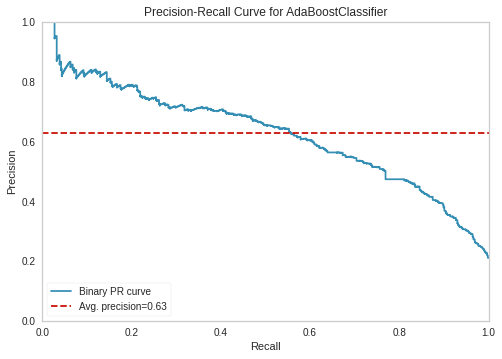

In [112]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(random_state = 101),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TF-IDF

In [113]:
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [114]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[2277  505]
 [ 161  454]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2782
           1       0.47      0.74      0.58       615

    accuracy                           0.80      3397
   macro avg       0.70      0.78      0.72      3397
weighted avg       0.85      0.80      0.82      3397

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     15758
           1       0.50      0.78      0.61      3486

    accuracy                           0.82     19244
   macro avg       0.72      0.81      0.75     19244
weighted avg       0.87      0.82      0.83     19244



In [115]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,3.156947,0.036777,0.452736,0.471822,0.782235,0.824673,0.573529,0.600232,0.789091,0.801028
2,3.714244,0.042572,0.466425,0.511550,0.736390,0.776538,0.571111,0.616787,0.799481,0.825221
3,3.193978,0.041244,0.479478,0.515477,0.736390,0.780363,0.580791,0.620847,0.807273,0.827357
4,3.179808,0.043260,0.480216,0.477732,0.765043,0.813835,0.590055,0.602052,0.807273,0.805127
5,3.512794,0.036875,0.463934,0.465542,0.813218,0.826641,0.590814,0.595637,0.796258,0.796651
6,3.097809,0.037932,0.480663,0.506804,0.750000,0.783301,0.585859,0.615423,0.808212,0.822633
7,3.634709,0.039181,0.448052,0.470007,0.793103,0.818993,0.572614,0.597258,0.785863,0.799885
8,3.511549,0.038621,0.493409,0.506807,0.752874,0.782983,0.596132,0.615327,0.815489,0.822633
9,3.135915,0.036314,0.444094,0.459679,0.808023,0.830411,0.573171,0.591776,0.781705,0.792494
10,3.089348,0.036508,0.472039,0.469351,0.822350,0.824992,0.599791,0.598312,0.800936,0.799365


In [116]:
df_scores.mean()[2:]

test_precision     0.468105
train_precision    0.485477
test_recall        0.775963
train_recall       0.806273
test_f1            0.583387
train_f1           0.605365
test_accuracy      0.799158
train_accuracy     0.809239
dtype: float64

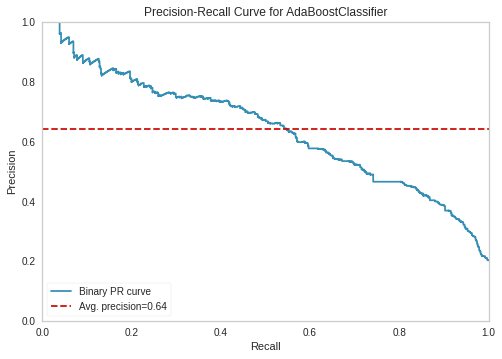

In [117]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(random_state = 101),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## DL modeling

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [119]:
df

,Text,Target_label
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
23481,I was very happy to snag this dress at such a ...,0
23482,"It reminds me of maternity clothes. soft, stre...",0
23483,"This fit well, but the top was very see throug...",1
23484,I bought this dress for a wedding i have this ...,0


In [120]:
df.isna().sum()

Text            0
Target_label    0
dtype: int64

In [121]:
df["Target_label"].value_counts()

0    18540
1     4101
Name: Target_label, dtype: int64

### Tokenization

In [122]:
X = df["Text"]
y = df['Target_label']

In [123]:
num_words = 10000

#Texti sayısal forma dönüştürürken ve eğitim yaparken  datamda en sık kullanılan ilk 10000 tokeni dikkate almasını söylüyoruz.

In [124]:
tokenizer = Tokenizer(num_words=num_words)

In [125]:
tokenizer.fit_on_texts(X)

### Creating word index

In [126]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [127]:
len(tokenizer.word_index) # Unique token sayısı

14847

### Converting tokens to numeric

In [128]:
X_num_tokens = tokenizer.texts_to_sequences(X)  # text i sayısal dizine dönüştürdük

In [129]:
X[60]

"This dress is simply beautiful and stunning. it is so figure flattering and i can't wait to wear it. size small worked for me, and since i'm tall it fell right to my ankle which is perfect for me. i could not be happier with the purchase and the keyhole in the back is a beautiful detail."

In [130]:
print(X_num_tokens[60])

[7, 18, 6, 896, 73, 3, 545, 5, 6, 16, 361, 58, 3, 2, 229, 338, 8, 32, 5, 22, 46, 561, 12, 31, 3, 235, 36, 322, 5, 473, 127, 8, 17, 567, 82, 6, 54, 12, 31, 2, 118, 19, 29, 1545, 14, 1, 306, 3, 1, 2217, 9, 1, 63, 6, 4, 73, 257]


### Maximum number of tokens for all documents¶

In [131]:
len(X_num_tokens[60])

57

In [132]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [133]:
num_tokens[60]

57

In [134]:
num_tokens.max()

116

In [135]:
num_tokens.argmax()

16263

In [136]:
max_tokens = 104

In [137]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9708935117706815

In [138]:
sum(num_tokens < max_tokens)

21982

In [139]:
len(num_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [140]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [141]:
X_pad.shape

(22641, 104)

### Train Set Split

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

### Modeling

In [272]:
embedding_size = 100

In [273]:
from tensorflow.keras.layers import BatchNormalization

In [274]:
model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.6))

#model.add(BatchNormalization())
model.add(GRU(units=26, return_sequences=True))
model.add(Dropout(0.4))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))

In [275]:
optimizer = Adam(learning_rate=0.005)

In [276]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [277]:
model.summary() 

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 104, 100)          1000000   
                                                                 
 gru_43 (GRU)                (None, 104, 48)           21600     
                                                                 
 dropout_35 (Dropout)        (None, 104, 48)           0         
                                                                 
 gru_44 (GRU)                (None, 104, 26)           5928      
                                                                 
 dropout_36 (Dropout)        (None, 104, 26)           0         
                                                                 
 gru_45 (GRU)                (None, 12)                1440      
                                                                 
 dense_14 (Dense)            (None, 1)               

In [278]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [279]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [280]:
model.fit(X_train, y_train, epochs=12, batch_size=128, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/12
142/142 [==============================] - 8s 26ms/step - loss: 0.4679 - recall: 0.7876 - val_loss: 0.3633 - val_recall: 0.8646
Epoch 2/12
142/142 [==============================] - 3s 18ms/step - loss: 0.2771 - recall: 0.9165 - val_loss: 0.2978 - val_recall: 0.8439
Epoch 2: early stopping


## Model evaluation

In [281]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.467941,0.787565,0.363295,0.864634
1,0.277118,0.916489,0.297778,0.843902


<AxesSubplot:>

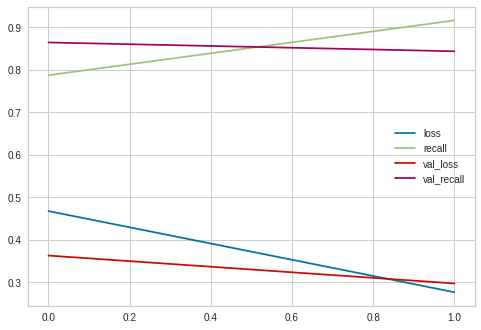

In [282]:
model_loss.plot()

In [283]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 1s 8ms/step - loss: 0.3633 - recall: 0.8646


[0.36329492926597595, 0.8646341562271118]

In [284]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 5s 8ms/step - loss: 0.2947 - recall: 0.9360


[0.29468247294425964, 0.9359951019287109]

In [285]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 2s 6ms/step
[[3125  584]
 [ 111  709]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.55      0.86      0.67       820

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529



In [286]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 3s 6ms/step
[[12882  1949]
 [  210  3071]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.94      0.74      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.90      0.83     18112
weighted avg       0.92      0.88      0.89     18112



142/142 [==============================] - 1s 7ms/step


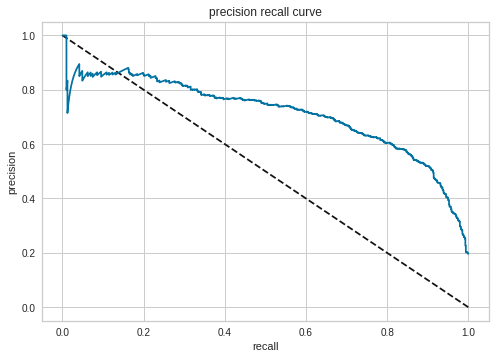

In [287]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [288]:
average_precision_score(y_test, y_pred_proba)

0.7131553199852372

In [289]:
#model.save('sentiment_projectDL_model.h5')

## BERT Modeling

In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

### Tokenization

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.4 MB/s 
     |████████████████████████████████| 7.6 MB 17.0 MB/s 
     |████████████████████████████████| 163 kB 41.1 MB/s 


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Womens Clothing E-Commerce Reviews.csv",index_col=0)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [9]:
df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})

In [10]:
df = df[["Review Text","Recommended IND"]]
df.head()
df.rename(columns={"Review Text":"Text", "Recommended IND":"Target_label"}, inplace=True)
df.dropna(inplace = True)


In [14]:
X = df["Text"].values
y= df["Target_label"].values

### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Transformation text to tensor

In [19]:
def transformation(X):
  # set array dimensions
  seq_len = 160
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [20]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

KeyboardInterrupt: ignored

In [ ]:
labels_train = y_train.reshape(-1,1)
labels_train

In [ ]:
labels_test = y_test.reshape(-1,1)
labels_test

In [ ]:
from tensorflow.keras.utils import to_categorical

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___